In [29]:
import numpy as np 
import pandas as pd 
import seaborn as sns

import plotly.express as px 
import plotly.graph_objs as pgo 
from plotly.subplots import make_subplots 

import matplotlib.pyplot as plt

# Dataset

In [13]:
main_df = pd.read_csv('SpotifyData.csv')
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [14]:
main_df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [15]:
main_df.tail()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
170648,0.608,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.734,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.637,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.195,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055
170652,0.642,2020,0.13200,"['KEVVO', 'J Balvin']",0.856,189507,0.721,1,7HmnJHfs0BkFzX4x8j0hkl,0.004710,7,0.1820,-4.928,1,Billetes Azules (with J Balvin),74,2020-10-16,0.1080,94.991


In [16]:
main_df.drop(['key','mode','year','explicit'],axis=1).describe().transpose().sort_index()

,count,mean,std,min,25%,50%,75%,max
acousticness,170653.0,0.502115,0.376032,0.0,0.1020,0.516000,0.8930,0.996
danceability,170653.0,0.537396,0.176138,0.0,0.4150,0.548000,0.6680,0.988
duration_ms,170653.0,230948.310666,126118.414668,5108.0,169827.0000,207467.000000,262400.0000,5403500.000
energy,170653.0,0.482389,0.267646,0.0,0.2550,0.471000,0.7030,1.000
instrumentalness,170653.0,0.167010,0.313475,0.0,0.0000,0.000216,0.1020,1.000
liveness,170653.0,0.205839,0.174805,0.0,0.0988,0.136000,0.2610,1.000
loudness,170653.0,-11.467990,5.697943,-60.0,-14.6150,-10.580000,-7.1830,3.855
popularity,170653.0,31.431794,21.826615,0.0,11.0000,33.000000,48.0000,100.000
speechiness,170653.0,0.098393,0.162740,0.0,0.0349,0.045000,0.0756,0.970
tempo,170653.0,116.861590,30.708533,0.0,93.4210,114.729000,135.5370,243.507


# Data Pre-Processing

In [17]:
main_df.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [18]:
main_df.set_index('release_date',inplace=True)
main_df.index = pd.to_datetime(main_df.index)
main_df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo
release_date,,,,,,,,,,,,,,,,,,
1921-01-01,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,0.0366,80.954
1921-01-01,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,0.4150,60.936
1921-01-01,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,0.0339,110.339
1921-01-01,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,0.0354,100.109
1921-01-01,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,0.0380,101.665


In [19]:
main_df['duration'] = main_df['duration_ms'].apply(lambda x:round(x/1000))
main_df.drop('duration_ms',axis=1,inplace=True)

# Feature Analysis

In [20]:
main_df.drop(['key','mode','year','explicit'],axis=1).describe().transpose().sort_index()

,count,mean,std,min,25%,50%,75%,max
acousticness,170653.0,0.502115,0.376032,0.0,0.1020,0.516000,0.8930,0.996
danceability,170653.0,0.537396,0.176138,0.0,0.4150,0.548000,0.6680,0.988
duration,170653.0,230.946752,126.117607,5.0,170.0000,207.000000,262.0000,5404.000
energy,170653.0,0.482389,0.267646,0.0,0.2550,0.471000,0.7030,1.000
instrumentalness,170653.0,0.167010,0.313475,0.0,0.0000,0.000216,0.1020,1.000
liveness,170653.0,0.205839,0.174805,0.0,0.0988,0.136000,0.2610,1.000
loudness,170653.0,-11.467990,5.697943,-60.0,-14.6150,-10.580000,-7.1830,3.855
popularity,170653.0,31.431794,21.826615,0.0,11.0000,33.000000,48.0000,100.000
speechiness,170653.0,0.098393,0.162740,0.0,0.0349,0.045000,0.0756,0.970
tempo,170653.0,116.861590,30.708533,0.0,93.4210,114.729000,135.5370,243.507


**Correlation**

Pearson Correlation Heatmap

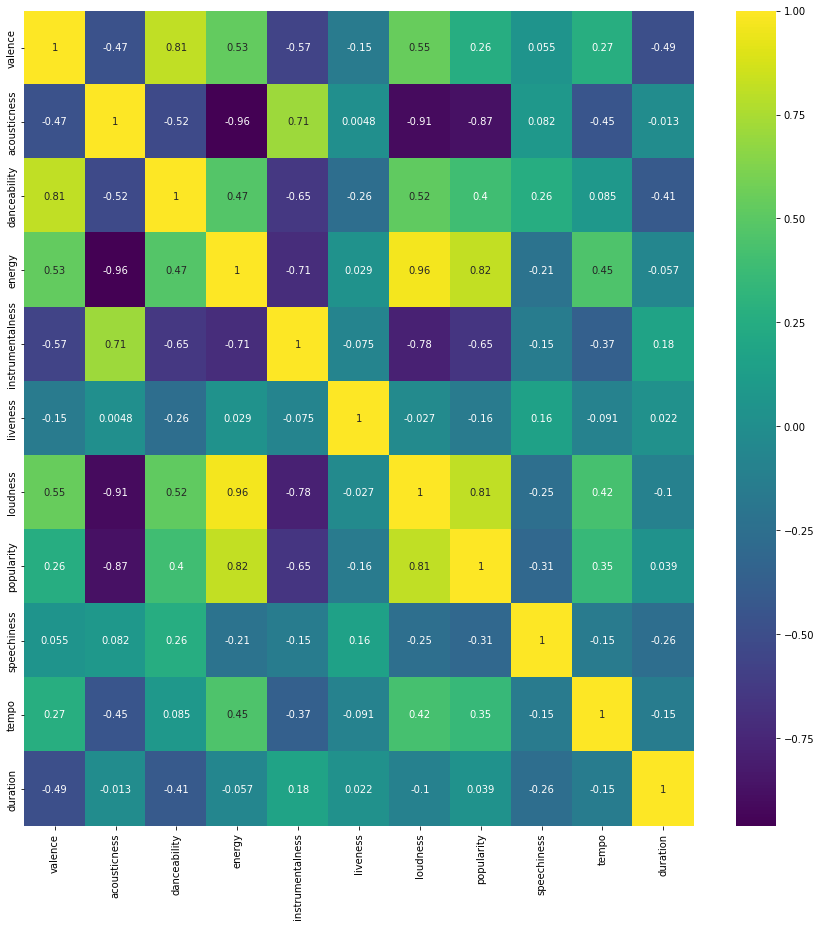

In [21]:
plt.figure(figsize = (15,15))
main_corr_df = main_df.drop(['key','mode','year','explicit'],axis=1).corr(method='pearson')
sns.heatmap(main_corr_df.corr(), annot=True, cmap="viridis")



There are obvious correlations between some of the features by definition such as, acousticness and loudness, acousticness and energy and so on

**Number of Tracks and Average Track Durations Over Years representing using bar graph**

In [22]:
fig = px.bar(main_df["id"].groupby(pd.Grouper(freq="Y")).count(),labels={
                     "release_date": "Release Year",
                     "value": "Number of tracks"})
fig.update_layout(height=600, width=1200, title_text="Number of Tracks Over Years")

fig.show()

Average Duration over the years in seconds

In [23]:
fig = px.bar(main_df["duration"].groupby(pd.Grouper(freq="Y")).mean(),labels={
                     "release_date": "Release Year",
                     "value": "Track Duration (sec)"})
fig.update_layout(height=600, width=1200, title_text="Track Duration Over Years")

fig.show()

**Genres' popularity changes over the decades
representing using Line graph**

In [28]:
main_w_genres_df = pd.read_csv('SpotifyData.csv')
main_w_genres_df.set_index('release_date',inplace=True)
main_w_genres_df.index = pd.to_datetime(main_w_genres_df.index)
genre_df = main_w_genres_df.drop(["artists"],axis=1).drop_duplicates()
decade_popularity = pd.DataFrame()
most_popular_genres = ["pop","indie","rock","metal","rap","jazz"]
decade_popularity.fillna(0,inplace=True)

In [ ]:
fig = px.line(decade_popularity, x=decade_popularity.index, y=decade_popularity.columns)
fig.update_layout(title="Genre Popularity over Decades",
                   xaxis_title='Decade',
                   yaxis_title='Popularity')
fig.show()


**Analysis of number of songs released per year using a histograms**

Text(0, 0.5, 'Number of Songs')

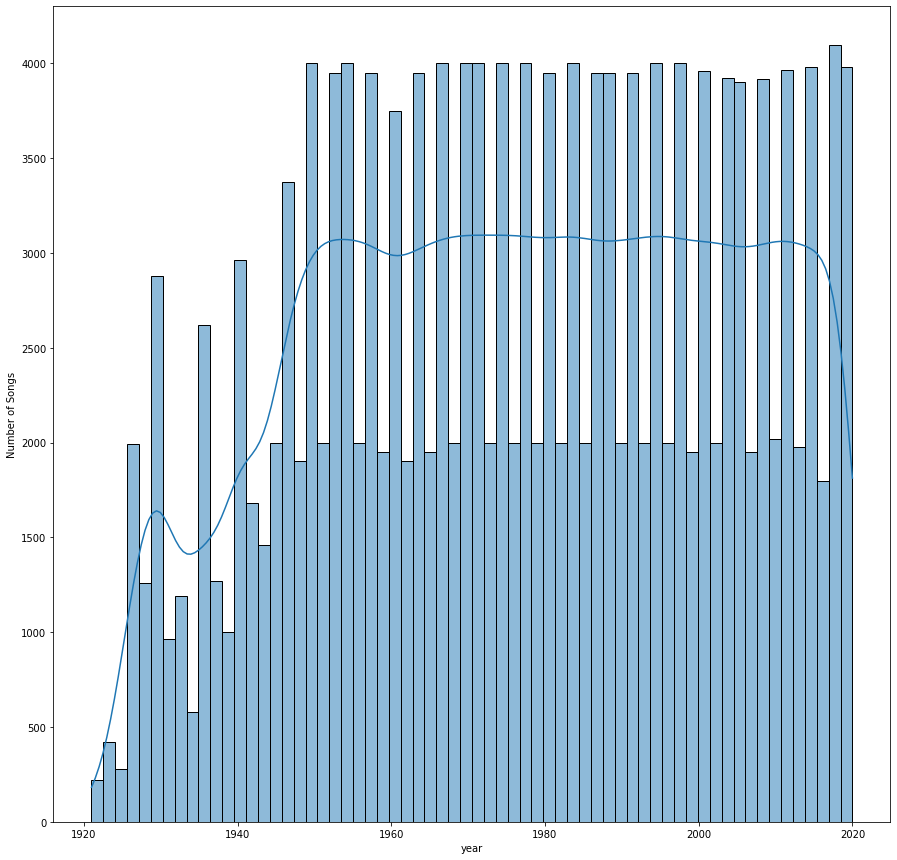

In [37]:
plt.figure(figsize = (15,15))
hist = sns.histplot(data=main_df['year'], kde=True)
hist.set_ylabel("Number of Songs")